In [2]:
using Random

In [3]:
function schaffer1(x)
    return x.^2;
end

schaffer1 (generic function with 1 method)

In [4]:
function schaffer2(x)
    return (x-2).^2;
end

schaffer2 (generic function with 1 method)

on prend l'ensemble [-1000;1000] sans décimal après la virgule


In [5]:
rng = MersenneTwister(1234)


MersenneTwister(1234)

In [8]:
div(8,2)

4

In [7]:
u=bitrand(rng, 16)
string(u)

"Bool[0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1]"

on crée un vecteur aléatoire de base 2 et de longueur 16 

In [1]:
convert=bitrand(rng, 16)
xprim=Array{Any}(nothing, 1, 16)
for i=1:16
    xprim[i]=convert[i]*2^(i-1);
end
@show xprim, convert

LoadError: UndefVarError: bitrand not defined

In [9]:
xprime=sum(xprim)
x=-100 + xprime.*(200/(2^16-1))

5.6656748302433755

selon le mapping, on peut ainsi obtenir le xprime  et aussi determiner le flottant associé entre -1000 et 1000, on peut commencer à écrire l'algorithme vega

In [10]:
using Decimals


In [11]:
parse(Float64,string(round(decimal(x), digits=2)))

5.67

In [12]:
u=round(decimal(x), digits=2)

Decimal(0, 567, -2)

In [13]:
parse(Float64,string(u))

5.67

on a fini par coder cette variable afin qu'elle soit traitable par un algorithme génétique

On va commencer par écrire le code de l'algorithme

In [14]:
function buildinitial(N)
    initial=zeros(N,20)
    for i =1:N
        initial[i,1]=i
        
        convert=bitrand(rng, 16) # on fait le mapping
        xprim=Array{Any}(nothing, 1, 16)
        for j=1:16
            xprim[j]=convert[j]*2^(j-1); #on convertit en ecriture décimal
        end
        xprime=sum(xprim) # on trouve le réel correspondant
        x=-10 + xprime.*(20/(2^16-1))
        rel=parse(Float64,string(round(decimal(x), digits=2))) # on supprime les décimales selon notre précision
        initial[i,2:17]=convert #on va mettre le code binaire qui est de taille 16
        initial[i,18]=rel
        initial[i,19]=schaffer1(rel)
        initial[i,20]=schaffer2(rel)
    end
    return initial
end
    

buildinitial (generic function with 1 method)

In [15]:
#On initialise la population initiale
#n=rand(10:20)=20 donc on a une population de 20
N=20
init=buildinitial(N)
@show init

init = [1.0 0.0 1.0 1.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 1.0 0.0 1.0 3.76 14.137599999999999 3.0975999999999995; 2.0 0.0 1.0 1.0 0.0 0.0 1.0 1.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 1.0 0.0 -1.69 2.8560999999999996 13.6161; 3.0 0.0 0.0 1.0 1.0 0.0 1.0 1.0 1.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0 1.0 0.54 0.2916 2.1315999999999997; 4.0 1.0 1.0 1.0 1.0 1.0 1.0 0.0 1.0 0.0 0.0 1.0 1.0 1.0 1.0 0.0 0.0 -5.25 27.5625 52.5625; 5.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 1.0 1.0 0.0 1.0 1.0 0.0 0.0 1.0 1.0 6.07 36.8449 16.5649; 6.0 1.0 1.0 0.0 1.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 1.0 0.0 0.0 -5.83 33.9889 61.3089; 7.0 0.0 1.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 1.0 1.0 0.0 1.0 1.0 7.27 52.85289999999999 27.772899999999996; 8.0 0.0 0.0 1.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 0.32 0.1024 2.8223999999999996; 9.0 1.0 1.0 0.0 1.0 1.0 1.0 1.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 -9.85 97.0225 140.42249999999999; 10.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 1.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 1.0 1.69 2.8560999999999996 

20×20 Matrix{Float64}:
  1.0  0.0  1.0  1.0  1.0  1.0  0.0  …  0.0  1.0   3.76  14.1376    3.0976
  2.0  0.0  1.0  1.0  0.0  0.0  1.0     1.0  0.0  -1.69   2.8561   13.6161
  3.0  0.0  0.0  1.0  1.0  0.0  1.0     0.0  1.0   0.54   0.2916    2.1316
  4.0  1.0  1.0  1.0  1.0  1.0  1.0     0.0  0.0  -5.25  27.5625   52.5625
  5.0  0.0  0.0  1.0  0.0  0.0  1.0     1.0  1.0   6.07  36.8449   16.5649
  6.0  1.0  1.0  0.0  1.0  1.0  0.0  …  0.0  0.0  -5.83  33.9889   61.3089
  7.0  0.0  1.0  1.0  0.0  1.0  0.0     1.0  1.0   7.27  52.8529   27.7729
  8.0  0.0  0.0  1.0  1.0  1.0  0.0     0.0  1.0   0.32   0.1024    2.8224
  9.0  1.0  1.0  0.0  1.0  1.0  1.0     0.0  0.0  -9.85  97.0225  140.422
 10.0  0.0  0.0  1.0  0.0  1.0  0.0     0.0  1.0   1.69   2.8561    0.0961
 11.0  1.0  1.0  0.0  0.0  1.0  1.0  …  0.0  0.0  -8.6   73.96    112.36
 12.0  0.0  0.0  0.0  1.0  0.0  1.0     0.0  1.0   3.35  11.2225    1.8225
 13.0  0.0  1.0  0.0  0.0  0.0  0.0     1.0  0.0  -3.85  14.8225   34.2225
 14.0

In [16]:
using Plots

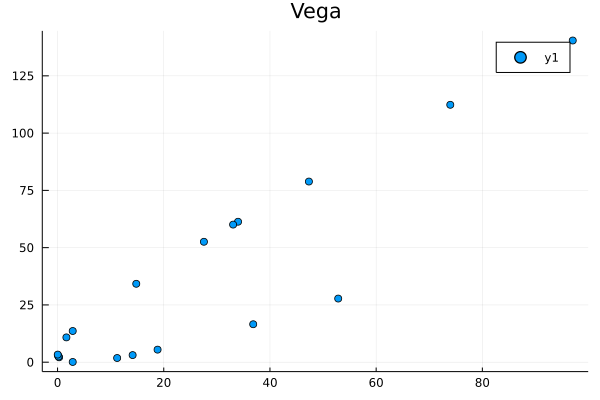

In [17]:
x=init[:,19]
y=init[:,20]
plot(x,y,
    title ="Vega",
    legend = true,
    seriestype = :scatter)

On va procéder à la partie croosover qui consiste à génere la population d'enfant

on va ranger les minimums de schaffer1 et schaffer2 calculées dans builtinitial
de plus petit au plus grand en 2 tableau afin d'avoir les deux parents

In [18]:
mini1=sort(init[:, 19]) #pour schaffer1
mini1=mini1[1:10]

10-element Vector{Float64}:
  0.0324
  0.1024
  0.18489999999999998
  0.2916
  1.6641000000000001
  2.8560999999999996
  2.8560999999999996
 11.2225
 14.137599999999999
 14.822500000000002

In [19]:
mini2=sort(init[:, 20])#pour schaffer2
mini2=mini2[1:10]

10-element Vector{Float64}:
  0.09610000000000003
  1.8225000000000002
  2.1315999999999997
  2.4649
  2.8223999999999996
  3.0975999999999995
  3.3124000000000002
  5.475599999999999
 10.8241
 13.6161

In [20]:
#on va créer une matrice avec les deux parents
function subgenerate(initialisation)
    subpop1=sortslices(initialisation, dims=1, by = x -> x[19]) #on trie le 1er groupe avec les 10 meilleurs résulats de schaffer1
    subpop2=sortslices(initialisation, dims=1,by = x -> x[20]) #on fait de même pour schaffer2
    subpop=vcat(subpop1[1:10,:], subpop2[1:10,:]) #on a un ensemble découpé en 2 parties 
    for i=1:20
        subpop[i,1]=i #on remet à jour les indexs
    end
    return subpop
end

@show cross=subgenerate(init)

cross = subgenerate(init) = [1.0 0.0 1.0 0.0 1.0 1.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.18 0.0324 3.3124000000000002; 2.0 0.0 0.0 1.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 0.32 0.1024 2.8223999999999996; 3.0 1.0 1.0 0.0 1.0 1.0 1.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 0.43 0.18489999999999998 2.4649; 4.0 0.0 0.0 1.0 1.0 0.0 1.0 1.0 1.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0 1.0 0.54 0.2916 2.1315999999999997; 5.0 0.0 1.0 1.0 0.0 1.0 1.0 1.0 0.0 1.0 1.0 1.0 1.0 0.0 1.0 1.0 0.0 -1.29 1.6641000000000001 10.8241; 6.0 0.0 1.0 1.0 0.0 0.0 1.0 1.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 1.0 0.0 -1.69 2.8560999999999996 13.6161; 7.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 1.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 1.0 1.69 2.8560999999999996 0.09610000000000003; 8.0 0.0 0.0 0.0 1.0 0.0 1.0 1.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 3.35 11.2225 1.8225000000000002; 9.0 0.0 1.0 1.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 1.0 0.0 1.0 3.76 14.137599999999999 3.0975999999999995; 10.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 1.0 0.0

20×20 Matrix{Float64}:
  1.0  0.0  1.0  0.0  1.0  1.0  0.0  …  0.0  1.0   0.18   0.0324   3.3124
  2.0  0.0  0.0  1.0  1.0  1.0  0.0     0.0  1.0   0.32   0.1024   2.8224
  3.0  1.0  1.0  0.0  1.0  1.0  1.0     0.0  1.0   0.43   0.1849   2.4649
  4.0  0.0  0.0  1.0  1.0  0.0  1.0     0.0  1.0   0.54   0.2916   2.1316
  5.0  0.0  1.0  1.0  0.0  1.0  1.0     1.0  0.0  -1.29   1.6641  10.8241
  6.0  0.0  1.0  1.0  0.0  0.0  1.0  …  1.0  0.0  -1.69   2.8561  13.6161
  7.0  0.0  0.0  1.0  0.0  1.0  0.0     0.0  1.0   1.69   2.8561   0.0961
  8.0  0.0  0.0  0.0  1.0  0.0  1.0     0.0  1.0   3.35  11.2225   1.8225
  9.0  0.0  1.0  1.0  1.0  1.0  0.0     0.0  1.0   3.76  14.1376   3.0976
 10.0  0.0  1.0  0.0  0.0  0.0  0.0     1.0  0.0  -3.85  14.8225  34.2225
 11.0  0.0  0.0  1.0  0.0  1.0  0.0  …  0.0  1.0   1.69   2.8561   0.0961
 12.0  0.0  0.0  0.0  1.0  0.0  1.0     0.0  1.0   3.35  11.2225   1.8225
 13.0  0.0  0.0  1.0  1.0  0.0  1.0     0.0  1.0   0.54   0.2916   2.1316
 14.0  1.0  1.0

on a ainsi realiser l'étape du pickindividual, maintenant on va passer au shuffle

In [46]:
function melanger(cross,N)
    matmixer=zeros(N,N) #on créé la nouvelle matrice que 
    u=shuffle(cross[:,1])#on mélange les index
    for i=1:N# N=20 ici
        for j=1:20
            if u[i]==cross[j,1] # on parcourt tous les indexs afin de les arranger dans la nouvelle matrice
                matmixer[i,:]=cross[j,:] # on attribut toute la ligne correspondante
            end
        end
    end
    for i=1:20
        matmixer[i,1]=i #on remet à jour les indexs
    end
    return matmixer
end
@show matmixer=melanger(cross,20)
@show melanger(cross,20)[:,1]

matmixer = melanger(cross, 20) = [1.0 0.0 0.0 1.0 1.0 0.0 1.0 1.0 1.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0 1.0 0.54 0.2916 2.1315999999999997; 2.0 0.0 0.0 0.0 1.0 0.0 1.0 1.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 3.35 11.2225 1.8225000000000002; 3.0 0.0 1.0 1.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 1.0 0.0 1.0 3.76 14.137599999999999 3.0975999999999995; 4.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 1.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 1.0 1.69 2.8560999999999996 0.09610000000000003; 5.0 0.0 0.0 1.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 0.32 0.1024 2.8223999999999996; 6.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 1.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 1.0 1.69 2.8560999999999996 0.09610000000000003; 7.0 0.0 1.0 1.0 0.0 0.0 1.0 1.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 1.0 0.0 -1.69 2.8560999999999996 13.6161; 8.0 1.0 1.0 0.0 1.0 1.0 1.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 0.43 0.18489999999999998 2.4649; 9.0 0.0 0.0 1.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 0.32 0.1024 2.8223999999999996; 10.0 0.0 1.0 1.0 1.0 1.0

20-element Vector{Float64}:
  1.0
  2.0
  3.0
  4.0
  5.0
  6.0
  7.0
  8.0
  9.0
 10.0
 11.0
 12.0
 13.0
 14.0
 15.0
 16.0
 17.0
 18.0
 19.0
 20.0

On va initialiser la probabilité de crossover et de de mutation

In [47]:
matmixer[:,2:17]

20×16 Matrix{Float64}:
 0.0  0.0  1.0  1.0  0.0  1.0  1.0  1.0  …  1.0  1.0  0.0  0.0  0.0  0.0  1.0
 0.0  0.0  0.0  1.0  0.0  1.0  1.0  1.0     1.0  0.0  1.0  0.0  1.0  0.0  1.0
 0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0     0.0  0.0  0.0  1.0  1.0  0.0  1.0
 0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0     0.0  1.0  0.0  1.0  0.0  0.0  1.0
 0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0     0.0  1.0  0.0  0.0  0.0  0.0  1.0
 0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  …  0.0  1.0  0.0  1.0  0.0  0.0  1.0
 0.0  1.0  1.0  0.0  0.0  1.0  1.0  0.0     1.0  0.0  1.0  0.0  1.0  1.0  0.0
 1.0  1.0  0.0  1.0  1.0  1.0  1.0  0.0     0.0  1.0  0.0  0.0  0.0  0.0  1.0
 0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0     0.0  1.0  0.0  0.0  0.0  0.0  1.0
 0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0     0.0  0.0  0.0  1.0  1.0  0.0  1.0
 0.0  0.0  0.0  1.0  0.0  1.0  1.0  1.0  …  1.0  0.0  1.0  0.0  1.0  0.0  1.0
 0.0  1.0  1.0  0.0  1.0  1.0  1.0  0.0     1.0  1.0  1.0  0.0  1.0  1.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  

on pose Pc=0.5 et Pm=0.1

In [51]:
using Random
Pc=0.5
Pm=0.1 #on va parcourir le tableau de 2 en 2 et obtenir les parents
for i=1:2:19 #on parcourt de 2 en 2 le tableau matmixer
    if rand(1)< 0.5 #on véerifie que l'on puisse faire le crossover
        cut=rand((2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17)) #on va modifier le code binaire car il est codé en 16 bits et on va de 2 à 17 selon les cases de notre matrice car la collone 1 est l'index
    end
    matmixer[i,cut:17],matmixer[i+1,cut:17]= matmixer[i+1,cut:17],matmixer[i,cut:17] #on effectue le crossing jusqu'à 17 car au_dela on toucherait au colonnes qui ne correspondent pas aux bits
end

LoadError: MethodError: no method matching isless(::Vector{Float64}, ::Float64)
[0mClosest candidates are:
[0m  isless([91m::Union{StatsBase.PValue, StatsBase.TestStat}[39m, ::AbstractFloat) at C:\Users\PC du Chadiboo\.julia\packages\StatsBase\zjbXF\src\statmodels.jl:504
[0m  isless([91m::Union{StatsBase.PValue, StatsBase.TestStat}[39m, ::Real) at C:\Users\PC du Chadiboo\.julia\packages\StatsBase\zjbXF\src\statmodels.jl:495
[0m  isless(::AbstractVector{T} where T, [91m::AbstractVector{T} where T[39m) at abstractarray.jl:1989
[0m  ...

In [15]:
z=ones(4,11)

4×11 Matrix{Float64}:
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0

In [14]:
size(z)

(4, 11)